In [23]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

def get_flattened_data(file_path):
    with open(file_path) as file:
        data = json.load(file)
    flattened_data = []
    for key, values in data.items():
        for entry in values:
            if isinstance(entry, dict):
                entry['key'] = key
                flattened_data.append(entry)
            else:
                flattened_data.append({'key': key, 'latency': entry})

    # Convert flattened data to a pandas DataFrame
    df = pd.DataFrame(flattened_data)
    return df

def get_scatter_plot(file_path, y_axis):
    df = get_flattened_data(file_path)

    # Map keys to numerical values for coloring
    key_mapping = {key: idx for idx, key in enumerate(df['key'].unique())}
    df['key_color'] = df['key'].map(key_mapping)

    # Create a scatter plot
    scatter = plt.scatter(df['rows'], df[y_axis], c=df['key_color'], cmap='viridis')
    return scatter, key_mapping

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # including larger bounds than typical `
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

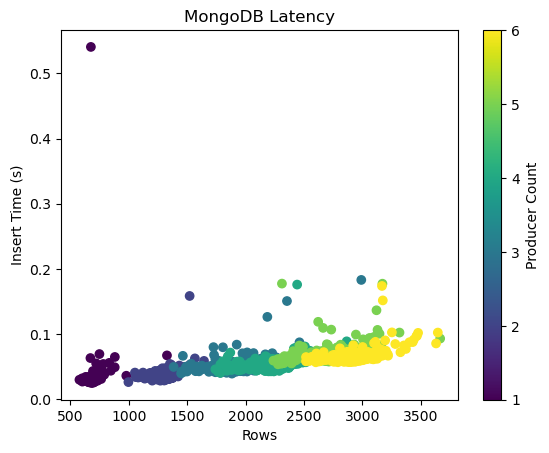

In [62]:
# MongoDB latency scatter


# Load the JSON data
scatter, key_mapping = get_scatter_plot('data/mongo/latencies_batch_w_mongo.json', 'insert_time')

plt.xlabel('Rows')
plt.ylabel('Insert Time')
plt.title('MongoDB Latency')

# Create a color bar with the correct labels
cbar = plt.colorbar(scatter, ticks=range(len(key_mapping)))
cbar.ax.set_yticklabels(key_mapping.keys())
cbar.set_label('Producer Count')

plt.show()

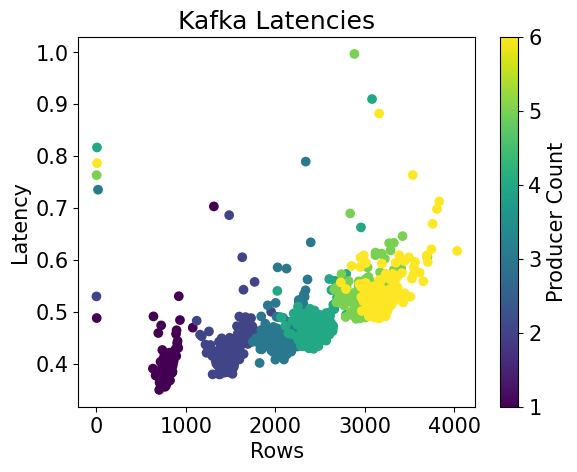

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def graph_sql_latency_scatter():
    # Load the JSON data
    with open('data/sql/latencies_batch_w_sql.json') as f:
        data = json.load(f)

    # Flatten the JSON structure
    flattened_data = []
    for key, values in data.items():
        for entry in values:
            if isinstance(entry, dict):
                entry['key'] = key
                flattened_data.append(entry)
            else:
                flattened_data.append({'key': key, 'latency': entry})

    # Convert flattened data to a pandas DataFrame
    df = pd.DataFrame(flattened_data)

    # Map keys to numerical values for coloring
    key_mapping = {key: idx for idx, key in enumerate(df['key'].unique())}
    df['key_color'] = df['key'].map(key_mapping)

    # Create a scatter plot
    scatter = plt.scatter(df['rows'], df['latency'], c=df['key_color'], cmap='viridis')
    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('Kafka Latencies')

    # Create a color bar with the correct labels
    cbar = plt.colorbar(scatter, ticks=range(len(key_mapping)))
    cbar.ax.set_yticklabels(key_mapping.keys())
    cbar.set_label('Producer Count')
    plt.rcParams.update({'font.size': 12})
    plt.show()
graph_sql_latency_scatter()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

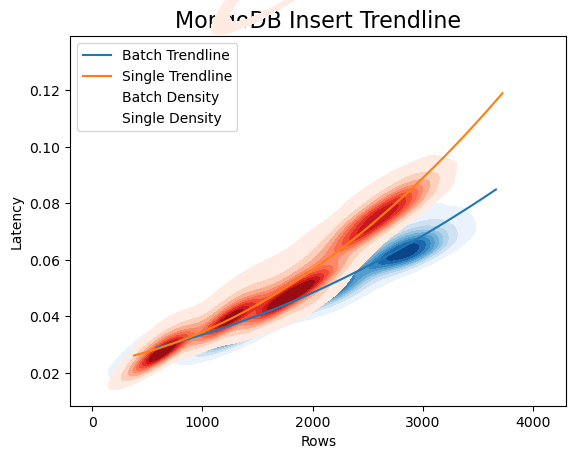

In [25]:
import seaborn as sns

def graph_mongo_single_vs_batch():
    # Load the JSON data
    df_batch = get_flattened_data('data/mongo/latencies_batch_w_mongo.json')
    df_single = get_flattened_data('data/mongo/latencies_single_w_mongo.json')

    # Fit a polynomial trendline
    batch_poly = np.poly1d(np.polyfit(df_batch['rows'], df_batch['insert_time'], 2))
    single_poly = np.poly1d(np.polyfit(df_single['rows'], df_single['insert_time'], 2))

    # Generate x values for the trendline
    x_batch = np.linspace(df_batch['rows'].min(), df_batch['rows'].max(), 100)
    x_single = np.linspace(df_single['rows'].min(), df_single['rows'].max(), 100)

    # Plot the trendline
    plt.plot(x_batch, batch_poly(x_batch), label='Batch Trendline')
    plt.plot(x_single, single_poly(x_single), label='Single Trendline')

    # Add KDE plots with clipping to data range
    sns.kdeplot(x=df_batch['rows'], y=df_batch['insert_time'], cmap='Blues', fill=True, label='Batch Density', clip=((df_batch['rows'].min(), df_batch['rows'].max()), (df_batch['insert_time'].min(), df_batch['insert_time'].max())))
    sns.kdeplot(x=df_single['rows'], y=df_single['insert_time'], cmap='Reds', fill=True, label='Single Density', clip=((df_single['rows'].min(), df_single['rows'].max()), (df_single['insert_time'].min(), df_single['insert_time'].max())))

    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('MongoDB Insert Trendline')
    plt.rc('figure', titlesize=16)
    plt.rc('axes', titlesize=16)
    plt.legend()
    plt.show()

graph_mongo_single_vs_batch()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

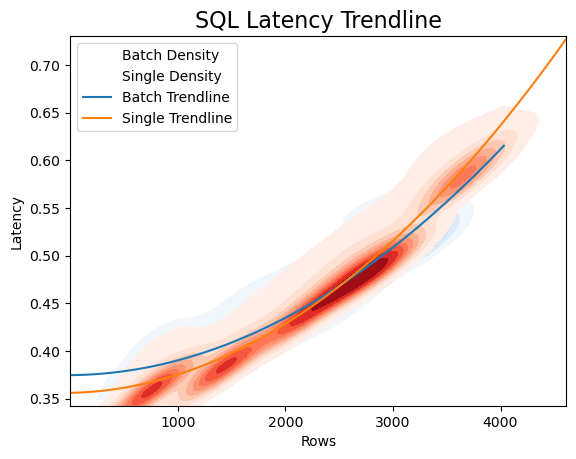

In [26]:
def sql_single_vs_batch():
    # Load the JSON data
    df_batch = get_flattened_data('data/sql/latencies_batch_w_sql.json')
    df_single = get_flattened_data('data/sql/latencies_single_w_sql.json')

    df_batch = remove_outliers(df_batch, 'latency')
    df_single = remove_outliers(df_single, 'latency')

    # Fit a polynomial trendline
    batch_poly = np.poly1d(np.polyfit(df_batch['rows'], df_batch['latency'], 2))
    single_poly = np.poly1d(np.polyfit(df_single['rows'], df_single['latency'], 2))

    # Generate x values for the trendline
    x_batch = np.linspace(df_batch['rows'].min(), df_batch['rows'].max(), 100)
    x_single = np.linspace(df_single['rows'].min(), df_single['rows'].max(), 100)

    # Add KDE plots with clipping to data range
    sns.kdeplot(x=df_batch['rows'], y=df_batch['latency'], cmap='Blues', fill=True, label='Batch Density', clip=((df_batch['rows'].min(), df_batch['rows'].max()), (df_batch['latency'].min(), df_batch['latency'].max())))
    sns.kdeplot(x=df_single['rows'], y=df_single['latency'], cmap='Reds', fill=True, label='Single Density', clip=((df_single['rows'].min(), df_single['rows'].max()), (df_single['latency'].min(), df_single['latency'].max())))

    # Plot the trendline
    plt.plot(x_batch, batch_poly(x_batch), label='Batch Trendline')
    plt.plot(x_single, single_poly(x_single), label='Single Trendline')
    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('SQL Latency Trendline')
    plt.rc('figure', titlesize=16)
    plt.rc('axes', titlesize=16)
    plt.legend()
    plt.show()
sql_single_vs_batch()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

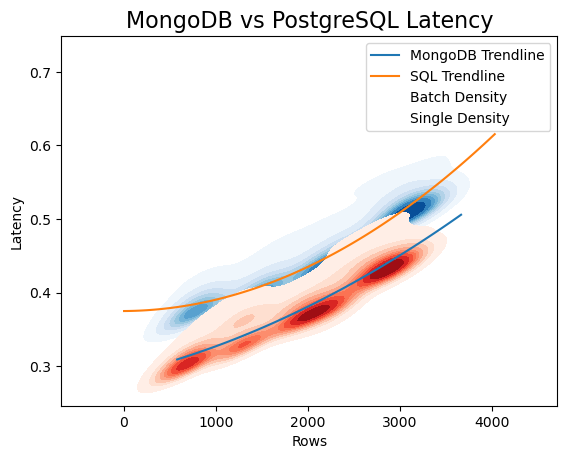

In [30]:

def mongo_vs_sql_batch():
    # Load the JSON data
    df_sql = get_flattened_data('data/sql/latencies_batch_w_sql.json')
    df_mongo = get_flattened_data('data/mongo/latencies_batch_w_mongo.json')

    df_sql = remove_outliers(df_sql, 'latency')
    df_mongo = remove_outliers(df_mongo, 'latency')

    # Fit a polynomial trendline
    mongo_poly = np.poly1d(np.polyfit(df_mongo['rows'], df_mongo['latency'], 2))
    sql_poly = np.poly1d(np.polyfit(df_sql['rows'], df_sql['latency'], 2))

    # Generate x values for the trendline
    x_batch = np.linspace(df_mongo['rows'].min(), df_mongo['rows'].max(), 100)
    x_single = np.linspace(df_sql['rows'].min(), df_sql['rows'].max(), 100)

    # Plot the trendline
    plt.plot(x_batch, mongo_poly(x_batch), label='MongoDB Trendline')
    plt.plot(x_single, sql_poly(x_single), label='SQL Trendline')

    sns.kdeplot(x=df_sql['rows'], y=df_sql['latency'], cmap='Blues', fill=True, label='Batch Density')
    sns.kdeplot(x=df_mongo['rows'], y=df_mongo['latency'], cmap='Reds', fill=True, label='Single Density')


    plt.xlabel('Rows')
    plt.ylabel('Latency')
    plt.title('MongoDB vs PostgreSQL Latency')
    plt.rc('figure', titlesize=16)
    plt.rc('axes', titlesize=16)

    plt.legend()
    plt.show()

mongo_vs_sql_batch()

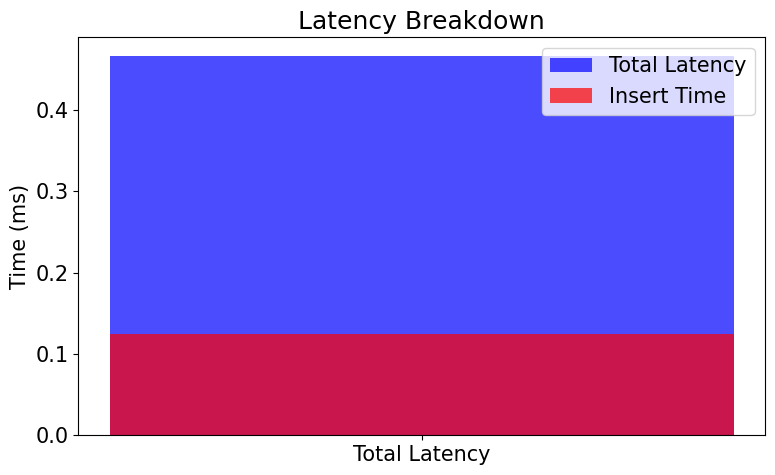

In [14]:
def insert_time_vs_latency():
    df = get_flattened_data('data/sql/latencies_single_w_sql.json')
    # Get the average insert_time and average latency from df
    avg_insert_time = df['insert_time'].mean()
    avg_latency = df['latency'].mean()

    plt.figure(figsize=(8, 5))

    # Plot total latency bar
    plt.bar('Total Latency', avg_latency, color='blue', alpha=0.7, label='Total Latency')

    # Overlay insert time bar at the bottom
    plt.bar('Total Latency', avg_insert_time, color='red', alpha=0.7, label='Insert Time')

    plt.ylabel('Time (ms)')
    plt.title('Latency Breakdown')
    plt.legend()
    plt.tight_layout()
    plt.rcParams.update({'font.size': 20})

    plt.show()

insert_time_vs_latency()

In [26]:
def find_cor_sql():
    df_batch = get_flattened_data('data/sql/latencies_batch_w_sql.json')
    df_single = get_flattened_data('data/sql/latencies_single_w_sql.json')
    print(df_batch.corr())
find_cor_sql()

             insert_time   latency      rows       key
insert_time     1.000000  0.837090  0.550742  0.625822
latency         0.837090  1.000000  0.819334  0.832767
rows            0.550742  0.819334  1.000000  0.968924
key             0.625822  0.832767  0.968924  1.000000


In [35]:
import pandas as pd
from scipy import stats

def get_stats():
    # Load the data
    df_mongo = get_flattened_data('data/mongo/latencies_batch_w_mongo.json')
    df_sql = get_flattened_data('data/sql/latencies_batch_w_sql.json')

    # Calculate mean, median, and standard deviation
    mongo_mean = df_mongo['insert_time'].mean()
    sql_mean = df_sql['insert_time'].mean()

    mongo_median = df_mongo['insert_time'].median()
    sql_median = df_sql['insert_time'].median()

    mongo_std = df_mongo['insert_time'].std()
    sql_std = df_sql['insert_time'].std()

    # Perform a t-test
    t_stat, p_value = stats.ttest_ind(df_mongo['insert_time'], df_sql['insert_time'])

    corr_mongo = df_mongo['rows'].corr(df_mongo['insert_time'])

    corr_sql = df_sql['rows'].corr(df_sql['insert_time'])

    print(f"MongoDB Mean Insert Time: {mongo_mean}")
    print(f"SQL Mean Insert Time: {sql_mean}")
    print(f"MongoDB Median Insert Time: {mongo_median}")
    print(f"SQL Median Insert Time: {sql_median}")
    print(f"MongoDB Insert Time Std Dev: {mongo_std}")
    print(f"SQL Insert Time Std Dev: {sql_std}")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value:.10f}")
    print(f"Correlation MongoDB: {corr_mongo}")
    print(f"Correlation SQL: {corr_sql}")
get_stats()

MongoDB Mean Insert Time: 0.04976176571430704
SQL Mean Insert Time: 0.10554196391201803
MongoDB Median Insert Time: 0.04894709587097168
SQL Median Insert Time: 0.10159409046173096
MongoDB Insert Time Std Dev: 0.016077948993093543
SQL Insert Time Std Dev: 0.027748923876911726
T-Statistic: -91.67039118325195
P-Value: 0.0000000000
Correlation MongoDB: 0.8514554930092486
Correlation SQL: 0.5507419766902809
